MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

Importing the Dependencies

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [125]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [126]:
# shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [127]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

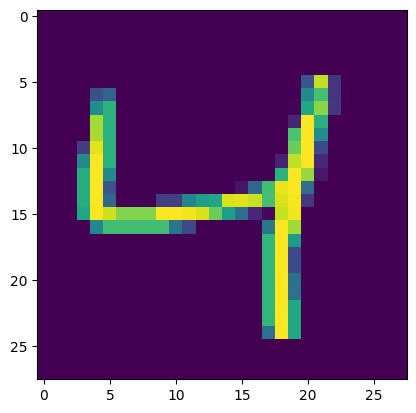

In [128]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [129]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [130]:
# Scalling the values
X_train = X_train/255
X_test = X_test/255

In [131]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [132]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [133]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

# compiling the Neural Network

In [134]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [135]:
# Training the neural networks
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8631 - loss: 0.4753 - val_accuracy: 0.9603 - val_loss: 0.1394
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9617 - loss: 0.1251 - val_accuracy: 0.9685 - val_loss: 0.1045
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0809 - val_accuracy: 0.9693 - val_loss: 0.1038
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.9723 - val_loss: 0.0952
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss: 0.0429 - val_accuracy: 0.9739 - val_loss: 0.0913
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9708 - val_loss: 0.1000
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9777 - val_loss: 0.0899
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.01

In [136]:
y_pred = model.predict(X_test)  # Get predicted probabilities
y_prob = y_pred.argmax(axis=1) # Find class with highest probability for each prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prob)

0.9769

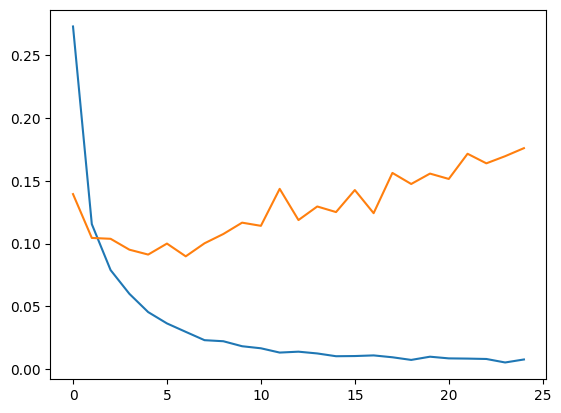

In [138]:
# PLOtting LOss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

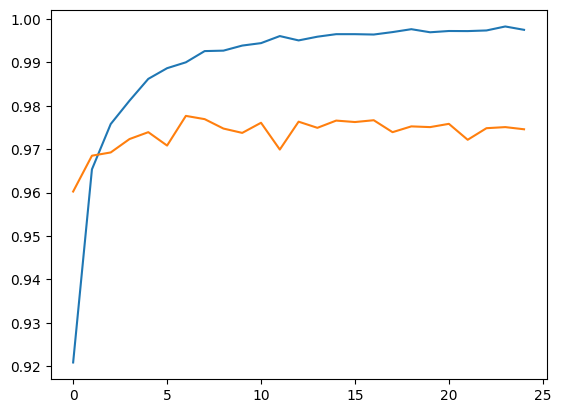

In [139]:
# PLOtting Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [140]:
# converting the prediction probabilities to class label for all test data points
import numpy as np
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [141]:
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 966    1    0    2    1    1    6    1    1    1]
 [   0 1123    4    1    0    0    3    2    2    0]
 [   2    0 1014    2    4    0    2    5    2    1]
 [   2    0    7  980    1    4    0    4    5    7]
 [   0    0    1    1  965    0    6    3    1    5]
 [   2    0    0   11    0  857   10    0    9    3]
 [   2    2    0    0    5    4  945    0    0    0]
 [   2    4   12    1    2    0    0  998    3    6]
 [   0    1    2    4    3    1    5    4  951    3]
 [   3    3    0    4   24    1    0    2    2  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

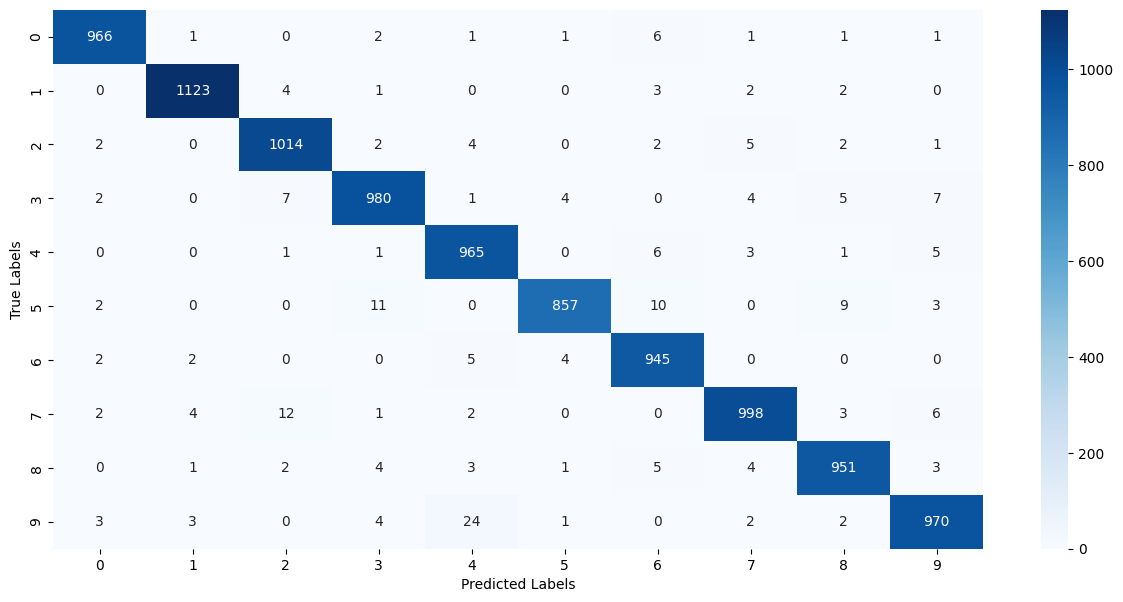

In [142]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Prediction


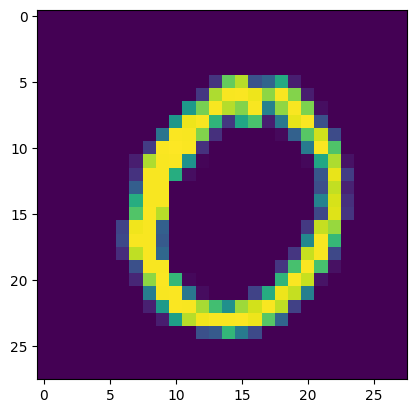

In [143]:
plt.imshow(X_test[101])

In [144]:
model.predict(X_test[101].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([0])

Building a Predictive System

In [167]:
import cv2
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.resize(input_image, (28, 28))


In [168]:

from google.colab.patches import cv2_imshow
cv2_imshow(input_image)


In [169]:
input_image_resize = input_image/255
type(input_image_resize)

numpy.ndarray

In [170]:
image_reshaped = np.reshape(input_image, [1,28,28])

In [171]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [172]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


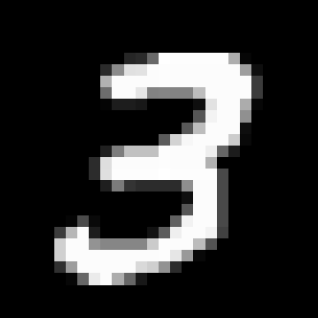

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The Handwritten Digit is recognised as  3


In [173]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)